In [23]:
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [24]:
df_p1_generation = pd.read_csv('C:/Users/Shreedhi Paul/Desktop/ML Stuff/Solar Power Generation/Datasets/Plant_1_Generation_Data.csv', header=0)

In [25]:
df_p1_generation.head(n=1000)

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,15-05-2020 00:00,4135001,1BY6WEcLGh8j5v7,0.000000,0.000000,0.000000,6259559.000
1,15-05-2020 00:00,4135001,1IF53ai7Xc0U56Y,0.000000,0.000000,0.000000,6183645.000
2,15-05-2020 00:00,4135001,3PZuoBAID5Wc2HD,0.000000,0.000000,0.000000,6987759.000
3,15-05-2020 00:00,4135001,7JYdWkrLSPkdwr4,0.000000,0.000000,0.000000,7602960.000
4,15-05-2020 00:00,4135001,McdE0feGgRqW7Ca,0.000000,0.000000,0.000000,7158964.000
...,...,...,...,...,...,...,...
995,15-05-2020 11:30,4135001,7JYdWkrLSPkdwr4,7328.000000,716.928571,2242.000000,7605202.000
996,15-05-2020 11:30,4135001,McdE0feGgRqW7Ca,6471.285714,633.857143,2518.714286,7161482.714
997,15-05-2020 11:30,4135001,VHMLBKoKgIrUVDU,7761.142857,759.214286,2252.285714,7208660.286
998,15-05-2020 11:30,4135001,WRmjgnKYAwPKWDb,8600.571429,840.085714,2217.000000,7030890.000


In [26]:
df_p1_sensor = pd.read_csv('C:/Users/Shreedhi Paul/Desktop/ML Stuff/Solar Power Generation/Datasets/Plant_1_Weather_Sensor_Data.csv', header=0)

In [27]:
df_p1_sensor.head()
#df_p1_generation.dtypes

,DATE_TIME,PLANT_ID,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15 00:00:00,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0
1,2020-05-15 00:15:00,4135001,HmiyD2TTLFNqkNe,25.084589,22.761668,0.0
2,2020-05-15 00:30:00,4135001,HmiyD2TTLFNqkNe,24.935753,22.592306,0.0
3,2020-05-15 00:45:00,4135001,HmiyD2TTLFNqkNe,24.846130,22.360852,0.0
4,2020-05-15 01:00:00,4135001,HmiyD2TTLFNqkNe,24.621525,22.165423,0.0


In [28]:
df_p1_sensor['DATE_TIME'] = pd.to_datetime(df_p1_sensor['DATE_TIME']) 
df_p1_sensor['TIME'] = df_p1_sensor['DATE_TIME'].dt.time 
df_p1_sensor['DATE'] = pd.to_datetime(df_p1_sensor['DATE_TIME'].dt.date)

In [29]:
df_p1_generation['DATE_TIME'] = pd.to_datetime(df_p1_generation['DATE_TIME']) # Conversion using Pandas built-in method
df_p1_generation['TIME'] = df_p1_generation['DATE_TIME'].dt.time # Creates new column and passes TIME into time 
df_p1_generation['DATE'] = pd.to_datetime(df_p1_generation['DATE_TIME'].dt.date) # Creates new column and passes DATE into time 


In [30]:
df_p1_sensor.head(n=1000)

,DATE_TIME,PLANT_ID,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,TIME,DATE
0,2020-05-15 00:00:00,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0,00:00:00,2020-05-15
1,2020-05-15 00:15:00,4135001,HmiyD2TTLFNqkNe,25.084589,22.761668,0.0,00:15:00,2020-05-15
2,2020-05-15 00:30:00,4135001,HmiyD2TTLFNqkNe,24.935753,22.592306,0.0,00:30:00,2020-05-15
3,2020-05-15 00:45:00,4135001,HmiyD2TTLFNqkNe,24.846130,22.360852,0.0,00:45:00,2020-05-15
4,2020-05-15 01:00:00,4135001,HmiyD2TTLFNqkNe,24.621525,22.165423,0.0,01:00:00,2020-05-15
...,...,...,...,...,...,...,...,...
995,2020-05-26 00:45:00,4135001,HmiyD2TTLFNqkNe,22.151906,19.948490,0.0,00:45:00,2020-05-26
996,2020-05-26 01:00:00,4135001,HmiyD2TTLFNqkNe,22.209784,19.795608,0.0,01:00:00,2020-05-26
997,2020-05-26 01:15:00,4135001,HmiyD2TTLFNqkNe,22.266960,19.688240,0.0,01:15:00,2020-05-26
998,2020-05-26 01:30:00,4135001,HmiyD2TTLFNqkNe,22.238922,19.587625,0.0,01:30:00,2020-05-26


In [31]:
df_p1_generation.head(n=1000)

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,TIME,DATE
0,2020-05-15 00:00:00,4135001,1BY6WEcLGh8j5v7,0.000000,0.000000,0.000000,6259559.000,00:00:00,2020-05-15
1,2020-05-15 00:00:00,4135001,1IF53ai7Xc0U56Y,0.000000,0.000000,0.000000,6183645.000,00:00:00,2020-05-15
2,2020-05-15 00:00:00,4135001,3PZuoBAID5Wc2HD,0.000000,0.000000,0.000000,6987759.000,00:00:00,2020-05-15
3,2020-05-15 00:00:00,4135001,7JYdWkrLSPkdwr4,0.000000,0.000000,0.000000,7602960.000,00:00:00,2020-05-15
4,2020-05-15 00:00:00,4135001,McdE0feGgRqW7Ca,0.000000,0.000000,0.000000,7158964.000,00:00:00,2020-05-15
...,...,...,...,...,...,...,...,...,...
995,2020-05-15 11:30:00,4135001,7JYdWkrLSPkdwr4,7328.000000,716.928571,2242.000000,7605202.000,11:30:00,2020-05-15
996,2020-05-15 11:30:00,4135001,McdE0feGgRqW7Ca,6471.285714,633.857143,2518.714286,7161482.714,11:30:00,2020-05-15
997,2020-05-15 11:30:00,4135001,VHMLBKoKgIrUVDU,7761.142857,759.214286,2252.285714,7208660.286,11:30:00,2020-05-15
998,2020-05-15 11:30:00,4135001,WRmjgnKYAwPKWDb,8600.571429,840.085714,2217.000000,7030890.000,11:30:00,2020-05-15


In [32]:
mergedata1 = df_p1_sensor.merge(df_p1_generation, left_on='DATE_TIME', right_on='DATE_TIME')
mergedata1.head()

,DATE_TIME,PLANT_ID_x,SOURCE_KEY_x,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,TIME_x,DATE_x,PLANT_ID_y,SOURCE_KEY_y,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,TIME_y,DATE_y
0,2020-05-15,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0,00:00:00,2020-05-15,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6259559.0,00:00:00,2020-05-15
1,2020-05-15,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0,00:00:00,2020-05-15,4135001,1IF53ai7Xc0U56Y,0.0,0.0,0.0,6183645.0,00:00:00,2020-05-15
2,2020-05-15,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0,00:00:00,2020-05-15,4135001,3PZuoBAID5Wc2HD,0.0,0.0,0.0,6987759.0,00:00:00,2020-05-15
3,2020-05-15,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0,00:00:00,2020-05-15,4135001,7JYdWkrLSPkdwr4,0.0,0.0,0.0,7602960.0,00:00:00,2020-05-15
4,2020-05-15,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0,00:00:00,2020-05-15,4135001,McdE0feGgRqW7Ca,0.0,0.0,0.0,7158964.0,00:00:00,2020-05-15


In [33]:
mergedata1.drop(columns =['TIME_y', 'DATE_y','PLANT_ID_y'], inplace=True)

In [34]:
mergedata1

,DATE_TIME,PLANT_ID_x,SOURCE_KEY_x,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,TIME_x,DATE_x,SOURCE_KEY_y,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,2020-05-15 00:00:00,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0,00:00:00,2020-05-15,1BY6WEcLGh8j5v7,0.0,0.0,0.000,6259559.0
1,2020-05-15 00:00:00,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0,00:00:00,2020-05-15,1IF53ai7Xc0U56Y,0.0,0.0,0.000,6183645.0
2,2020-05-15 00:00:00,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0,00:00:00,2020-05-15,3PZuoBAID5Wc2HD,0.0,0.0,0.000,6987759.0
3,2020-05-15 00:00:00,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0,00:00:00,2020-05-15,7JYdWkrLSPkdwr4,0.0,0.0,0.000,7602960.0
4,2020-05-15 00:00:00,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0,00:00:00,2020-05-15,McdE0feGgRqW7Ca,0.0,0.0,0.000,7158964.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
45675,2020-06-17 23:45:00,4135001,HmiyD2TTLFNqkNe,21.909288,20.427972,0.0,23:45:00,2020-06-17,uHbuxQJl8lW7ozc,0.0,0.0,5967.000,7287002.0
45676,2020-06-17 23:45:00,4135001,HmiyD2TTLFNqkNe,21.909288,20.427972,0.0,23:45:00,2020-06-17,wCURE6d3bPkepu2,0.0,0.0,5147.625,7028601.0
45677,2020-06-17 23:45:00,4135001,HmiyD2TTLFNqkNe,21.909288,20.427972,0.0,23:45:00,2020-06-17,z9Y9gH1T5YWrNuG,0.0,0.0,5819.000,7251204.0
45678,2020-06-17 23:45:00,4135001,HmiyD2TTLFNqkNe,21.909288,20.427972,0.0,23:45:00,2020-06-17,zBIq5rxdHJRwDNY,0.0,0.0,5817.000,6583369.0


In [35]:
corr = mergedata1.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(3)
# 'RdBu_r' & 'BrBG' are other good diverging colormaps

c:\users\shreedhi paul\appdata\local\programs\python\python39\lib\site-packages\pandas\io\formats\style.py:1264: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(s.to_numpy()) if vmin is None else vmin
c:\users\shreedhi paul\appdata\local\programs\python\python39\lib\site-packages\pandas\io\formats\style.py:1265: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(s.to_numpy()) if vmax is None else vmax


,PLANT_ID_x,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
PLANT_ID_x,nan,nan,nan,nan,nan,nan,nan,nan
AMBIENT_TEMPERATURE,nan,1.000,0.843,0.702,0.704,0.704,0.490,-0.037
MODULE_TEMPERATURE,nan,0.843,1.000,0.959,0.955,0.955,0.204,-0.015
IRRADIATION,nan,0.702,0.959,1.000,0.991,0.991,0.072,-0.005
DC_POWER,nan,0.704,0.955,0.991,1.000,1.000,0.077,0.004
AC_POWER,nan,0.704,0.955,0.991,1.000,1.000,0.077,0.004
DAILY_YIELD,nan,0.490,0.204,0.072,0.077,0.077,1.000,0.007
TOTAL_YIELD,nan,-0.037,-0.015,-0.005,0.004,0.004,0.007,1.000


In [36]:
mergedata1.describe()

,PLANT_ID_x,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
count,45680.0,45680.000000,45680.000000,45680.000000,45680.000000,45680.000000,45680.000000,4.568000e+04
mean,4135001.0,25.917168,31.877975,0.236834,3197.175971,312.652679,3313.146538,6.957007e+06
std,0.0,3.556550,12.638448,0.306316,4080.448523,398.668968,3156.100252,4.172386e+05
min,4135001.0,20.398505,18.140415,0.000000,0.000000,0.000000,0.000000,6.183645e+06
25%,4135001.0,22.930031,21.406390,0.000000,0.000000,0.000000,0.000000,6.512358e+06
50%,4135001.0,24.993020,25.379072,0.035266,464.196429,44.912500,2653.633928,7.115711e+06
75%,4135001.0,28.379008,42.757119,0.459503,6478.424107,634.481250,6318.000000,7.244521e+06
max,4135001.0,35.252486,65.545714,1.221652,14471.125000,1410.950000,9163.000000,7.846821e+06


In [37]:
plant1_dailygen = mergedata1.groupby('DATE_x')[['DC_POWER','AC_POWER', 'DAILY_YIELD','TOTAL_YIELD']].agg('sum').reset_index()
plant1_dailygen

,DATE_x,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,2020-05-15,5.627239e+06,550830.959402,5.053591e+06,1.339679e+10
1,2020-05-16,5.806138e+06,568359.821428,6.699905e+06,1.327337e+10
2,2020-05-17,6.759595e+06,660975.389285,7.804065e+06,1.450777e+10
3,2020-05-18,4.812549e+06,470969.708929,5.130290e+06,1.452094e+10
4,2020-05-19,5.437955e+06,532250.491070,5.896321e+06,1.370740e+10
5,2020-05-20,5.375586e+06,525084.567381,5.612536e+06,1.151763e+10
6,2020-05-21,6.781068e+06,662742.449405,6.627303e+06,9.446312e+09
7,2020-05-22,6.420685e+06,627830.107975,5.555931e+06,1.398968e+10
8,2020-05-23,7.630217e+06,745884.287974,8.468993e+06,1.353601e+10
9,2020-05-24,7.160354e+06,699817.810714,8.181251e+06,1.461760e+10


In [38]:
inverter_output = mergedata1.groupby('SOURCE_KEY_y')[['DC_POWER','AC_POWER', 'DAILY_YIELD','TOTAL_YIELD']].agg('sum').reset_index()
inverter_output

,SOURCE_KEY_y,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,1BY6WEcLGh8j5v7,6.147111e+06,601302.965829,6.845320e+06,1.334351e+10
1,1IF53ai7Xc0U56Y,6.794073e+06,664310.433214,7.068419e+06,1.302302e+10
2,3PZuoBAID5Wc2HD,6.760303e+06,661022.905713,7.064732e+06,1.468722e+10
3,7JYdWkrLSPkdwr4,6.634488e+06,648782.069601,7.105033e+06,1.607028e+10
4,McdE0feGgRqW7Ca,6.781573e+06,663187.841434,6.866329e+06,1.506848e+10
5,VHMLBKoKgIrUVDU,6.800948e+06,664987.863853,7.284932e+06,1.524889e+10
6,WRmjgnKYAwPKWDb,6.628367e+06,648177.968693,6.935716e+06,1.476769e+10
7,YxYtjZvoooNbGkE,6.649809e+06,650268.900234,6.761855e+06,1.496489e+10
8,ZnxXDlPa8U1GXgE,6.739692e+06,659041.124523,7.200188e+06,1.380127e+10
9,ZoEaEvLYb1n2sOq,6.604856e+06,645891.852380,6.696939e+06,1.492967e+10


In [39]:
inverter_output_per_day = mergedata1.groupby(['SOURCE_KEY_y','DATE_x'])[['DC_POWER','AC_POWER', 'DAILY_YIELD','TOTAL_YIELD']].agg('sum').reset_index()
inverter_output_per_day

,SOURCE_KEY_y,DATE_x,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,1BY6WEcLGh8j5v7,2020-05-15,235340.696429,23046.550595,245624.232144,5.823846e+08
1,1BY6WEcLGh8j5v7,2020-05-16,256629.875001,25124.491072,297475.732142,5.516450e+08
2,1BY6WEcLGh8j5v7,2020-05-17,288039.821438,28172.850000,333411.428572,6.024075e+08
3,1BY6WEcLGh8j5v7,2020-05-18,204030.303569,19970.507143,218056.660714,6.029685e+08
4,1BY6WEcLGh8j5v7,2020-05-19,232277.267856,22741.176786,287097.035714,5.846657e+08
...,...,...,...,...,...,...
501,zVJPv84UY57bAof,2020-06-13,339199.946419,33146.017857,394213.089286,7.039350e+08
502,zVJPv84UY57bAof,2020-06-14,299532.732141,29320.133928,341202.321429,7.046894e+08
503,zVJPv84UY57bAof,2020-06-15,279797.589283,27372.926786,329216.053572,7.053801e+08
504,zVJPv84UY57bAof,2020-06-16,255396.535715,25000.628571,297325.214285,7.060037e+08


In [40]:
max_irr = mergedata1.groupby('DATE_x')[['IRRADIATION']].agg('mean').reset_index()
max_irr

,DATE_x,IRRADIATION
0,2020-05-15,0.214321
1,2020-05-16,0.212170
2,2020-05-17,0.238869
3,2020-05-18,0.159026
4,2020-05-19,0.197407
5,2020-05-20,0.240073
6,2020-05-21,0.378774
7,2020-05-22,0.239951
8,2020-05-23,0.293333
9,2020-05-24,0.259762


Max irradiation per day


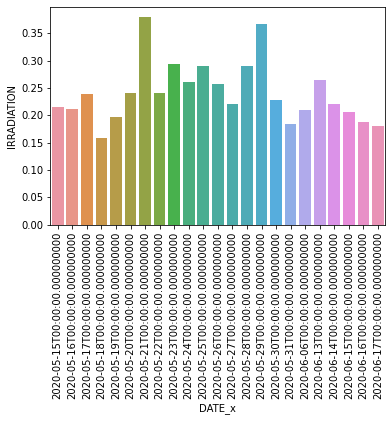

In [41]:
print('Max irradiation per day')
sns.barplot(x='DATE_x', y='IRRADIATION', data=max_irr)
plt.xticks(rotation=90)
plt.show()

Total yield per day


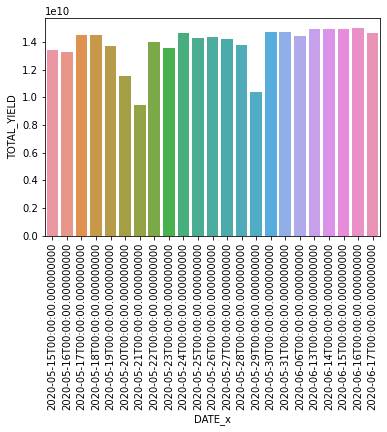

In [42]:
print('Total yield per day')
sns.barplot(x='DATE_x', y='TOTAL_YIELD', data=plant1_dailygen)
plt.xticks(rotation=90)
plt.show()

Total yield per inverter


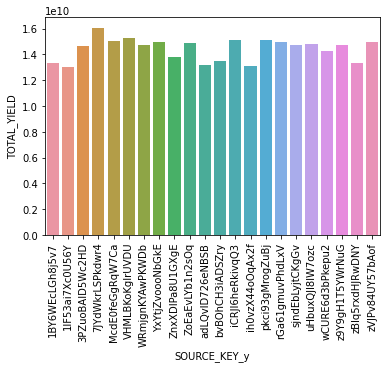

In [43]:
print('Total yield per inverter')
sns.barplot(x='SOURCE_KEY_y', y='TOTAL_YIELD', data=inverter_output)
plt.xticks(rotation=90)
plt.show()

In [44]:
mergedata1.columns

Index(['DATE_TIME', 'PLANT_ID_x', 'SOURCE_KEY_x', 'AMBIENT_TEMPERATURE',
       'MODULE_TEMPERATURE', 'IRRADIATION', 'TIME_x', 'DATE_x', 'SOURCE_KEY_y',
       'DC_POWER', 'AC_POWER', 'DAILY_YIELD', 'TOTAL_YIELD'],
      dtype='object')

In [45]:
X = mergedata1[['AMBIENT_TEMPERATURE', 'MODULE_TEMPERATURE', 'IRRADIATION']] # Features
y = mergedata1['AC_POWER'] # Target

In [46]:
from sklearn.model_selection import train_test_split

In [47]:
# Training the model
from sklearn.linear_model import LinearRegression

In [48]:
lm = LinearRegression()

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [56]:
lm.fit(X_train, y_train)

LinearRegression()

In [57]:
predictions1 = lm.predict(X_test)
predictions1

array([ 197.24180602,    4.31636412,  960.51536415, ...,  781.60801364,
       1139.7179795 ,  566.12067939])

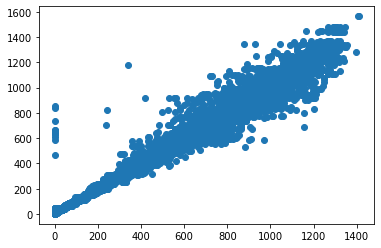

In [58]:
plt.scatter(y_test, predictions1)

In [69]:
from sklearn import metrics

MAE = metrics.mean_absolute_error(y_test,predictions1)
MSE = metrics.mean_squared_error(y_test,predictions1)
RMSE = np.sqrt(metrics.mean_squared_error(y_test,predictions1))
R2 = r2_score(y_test,predictions1)


In [70]:
print('MAE: ', MAE)
print('MSE: ',MSE)
print('RMSE: ', RMSE)
print('R2:',R2)

MAE:  25.62330922940789
MSE:  2690.7598348809606
RMSE:  51.87253449447945
R2: 0.983071375751114


In [64]:
#The lower value of MAE, MSE, and RMSE implies higher accuracy of a regression model. 
#https://medium.com/analytics-vidhya/mae-mse-rmse-coefficient-of-determination-adjusted-r-squared-which-metric-is-better-cd0326a5697e